## Final Project

Eve Schoenrock & Rachel Grace | Bayesian Machine Learning

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import pymc as pm
import arviz as az
import graphviz
from scipy.special import expit as invlogit
import scipy
import matplotlib.pyplot as plt
from random import seed
import random
import seaborn as sns
seed(2425)
os.chdir('/Users/eveschoenrock/Desktop/University of Virginia/UVA Data Science/DS6040/Project/Data/')
#os.chdir('\\Users\\Rachel\\OneDrive\\MSDS\\DS6040\\Project')

In [2]:
fetus = pd.read_csv('fetal_health.csv')
fetus.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [3]:
fetus.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [4]:
fetus.drop(['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'], axis = 1, inplace=True)
fetus.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,13.6,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,10.6,3.0


# Analysis with pathological and suspect combined

In [5]:
fetus['fetal_outcome'] = fetus['fetal_health'].map({1.0: 0, 2.0: 1, 3.0:1}) # pathelogical and suspect classified as unhealthy
fetus['severe_decelerations_exist'] = fetus['severe_decelerations'].map({0.000:0, 0.001:1}) # 1 = existing, 0 = non-existent
fetus['prolongued_decelerations_exist'] = fetus['prolongued_decelerations'].map({0.000:0, .002:1, .001:1, .003:1, .004:1, .005:1}) # 1 = existing, 0 = non-existent

In [6]:
fetus.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health,fetal_outcome,severe_decelerations_exist,prolongued_decelerations_exist
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,2.0,1,0,0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,1.0,0,0,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,1.0,0,0,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,1.0,0,0,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,1.0,0,0,0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,3.0,1,0,1
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,3.0,1,0,1
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,3.0,1,0,0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,13.6,3.0,1,0,0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,10.6,3.0,1,0,0


In [7]:
fetus.drop(['fetal_health', 'severe_decelerations', 'prolongued_decelerations'], axis=1, inplace=True)
fetus.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_outcome,severe_decelerations_exist,prolongued_decelerations_exist
0,120.0,0.000,0.0,0.000,0.000,73.0,0.5,43.0,2.4,1,0,0
1,132.0,0.006,0.0,0.006,0.003,17.0,2.1,0.0,10.4,0,0,0
2,133.0,0.003,0.0,0.008,0.003,16.0,2.1,0.0,13.4,0,0,0
3,134.0,0.003,0.0,0.008,0.003,16.0,2.4,0.0,23.0,0,0,0
4,132.0,0.007,0.0,0.008,0.000,16.0,2.4,0.0,19.9,0,0,0
5,134.0,0.001,0.0,0.010,0.009,26.0,5.9,0.0,0.0,1,0,1
6,134.0,0.001,0.0,0.013,0.008,29.0,6.3,0.0,0.0,1,0,1
7,122.0,0.000,0.0,0.000,0.000,83.0,0.5,6.0,15.6,1,0,0
8,122.0,0.000,0.0,0.002,0.000,84.0,0.5,5.0,13.6,1,0,0
9,122.0,0.000,0.0,0.003,0.000,86.0,0.3,6.0,10.6,1,0,0


In [8]:
fetal_outcome_list = fetus['fetal_outcome']
severe_decelerations_list = fetus['severe_decelerations_exist']
prolongued_decelerations_list = fetus['prolongued_decelerations_exist']

scaler = StandardScaler() # scale numeric variables

names = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'fetal_outcome', 'severe_decelerations_exist',
        'prolongued_decelerations_exist']

fetus_scaled = scaler.fit_transform(fetus.to_numpy())
fetus_scaled = pd.DataFrame(fetus_scaled, columns=names)

fetus_scaled['fetal_outcome'] = fetal_outcome_list
fetus_scaled['severe_decelerations_exist'] = severe_decelerations_list
fetus_scaled['prolongued_decelerations_exist'] = prolongued_decelerations_list

In [9]:
fetus_scaled.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_outcome,severe_decelerations_exist,prolongued_decelerations_exist
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,1.513190,-0.943095,1.802542,-1.028560,1,0,0
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-1.744751,0.868841,-0.535361,0.393176,0,0,0
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-1.802928,0.868841,-0.535361,0.926327,0,0,0
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-1.802928,1.208579,-0.535361,2.632411,0,0,0
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-1.802928,1.208579,-0.535361,2.081488,0,0,0
5,0.070757,-0.563635,-0.20321,1.912687,2.402604,-1.221153,5.172188,-0.535361,-1.455081,1,0,1
6,0.070757,-0.563635,-0.20321,2.931233,2.064711,-1.046621,5.625172,-0.535361,-1.455081,1,0,1
7,-1.148938,-0.822388,-0.20321,-1.482465,-0.638438,2.094965,-0.943095,-0.209142,1.317304,1,0,0
8,-1.148938,-0.822388,-0.20321,-0.803434,-0.638438,2.153143,-0.943095,-0.263512,0.961870,1,0,0
9,-1.148938,-0.822388,-0.20321,-0.463919,-0.638438,2.269498,-1.169587,-0.209142,0.428719,1,0,0


In [10]:
# split into test and train
training_data = fetus_scaled.sample(frac=0.8, random_state=25)
testing_data = fetus_scaled.drop(training_data.index)

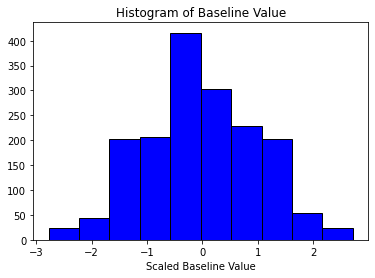

In [11]:
# baseline value distribution
plt.hist(training_data['baseline value'], color='blue', edgecolor='black')
plt.title('Histogram of Baseline Value')
plt.xlabel('Scaled Baseline Value');

Baseline value appears to be distributed as a Gaussian.

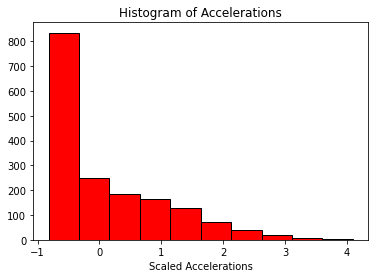

In [12]:
# accelerations distribution
plt.hist(training_data['accelerations'], color='red', edgecolor='black')
plt.title('Histogram of Accelerations')
plt.xlabel('Scaled Accelerations');

Accelerations appears to have a skewed distribution that resembles a beta distribution.

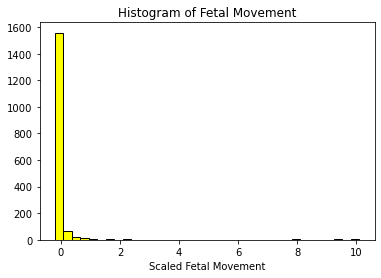

In [13]:
# fetal movement distribution
plt.hist(training_data['fetal_movement'], color='yellow', edgecolor='black', bins=int(180/5))
plt.title('Histogram of Fetal Movement')
plt.xlabel('Scaled Fetal Movement');

Observations of fetal movement are focused at 0 (or a bit less than 0). We should consider using a uniform distribution or non-informative beta prior here.

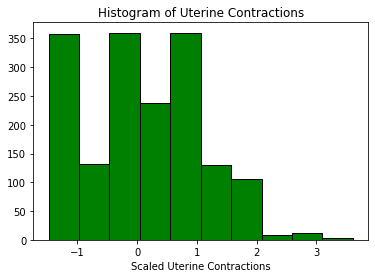

In [14]:
# uterine contractions distribution
plt.hist(training_data['uterine_contractions'], color='green', edgecolor='black')
plt.title('Histogram of Uterine Contractions')
plt.xlabel('Scaled Uterine Contractions');

Consider a wide beta distribution for uterine contractions.

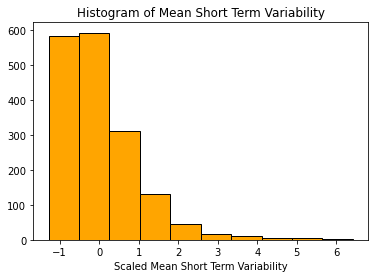

In [15]:
plt.hist(training_data['mean_value_of_short_term_variability'], color='orange', edgecolor='black')
plt.title('Histogram of Mean Short Term Variability')
plt.xlabel('Scaled Mean Short Term Variability');

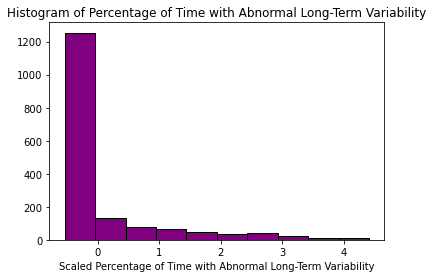

In [16]:
plt.hist(training_data['percentage_of_time_with_abnormal_long_term_variability'], color='purple', edgecolor='black')
plt.title('Histogram of Percentage of Time with Abnormal Long-Term Variability')
plt.xlabel('Scaled Percentage of Time with Abnormal Long-Term Variability');

This is another skewed distribution.

In [17]:
mean = fetus['baseline value'].mean()
std = fetus['baseline value'].std()

In [18]:
# base rate - informed prior for 'baseline value' for FHR
prior_mean = (135 - mean)/std
k = prior_mean/mean
prior_sigma = 8.33333 * k

In [19]:
# separarate training and test data into separate dataframes for Y and X
X_train = training_data.drop('fetal_outcome', axis=1)
Y_train = training_data['fetal_outcome']

X_test = testing_data.drop('fetal_outcome', axis=1)
Y_test = testing_data['fetal_outcome']

In [20]:
# complete model
import random
random.seed(2425)

with pm.Model() as complete_fetus_model:

    Y = pm.MutableData(name='Y', value=Y_train)
    X = pm.MutableData(name='X', value=X_train)
    k = X_train.shape[1]
    alpha = pm.Normal('alpha', mu=0, sigma=100) # intercept 
    # beta coefs in MV Gaussian
    beta = pm.MvNormal('beta', mu=np.zeros(k), cov=100*np.eye(k), shape=k)
    mu = alpha + pm.math.dot(X, beta)
    p = pm.Deterministic('p', pm.invlogit(mu))
    yhat = pm.Bernoulli('yhat', p=p, observed=Y)
    
    trace_main = pm.sample(1000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 54 seconds.


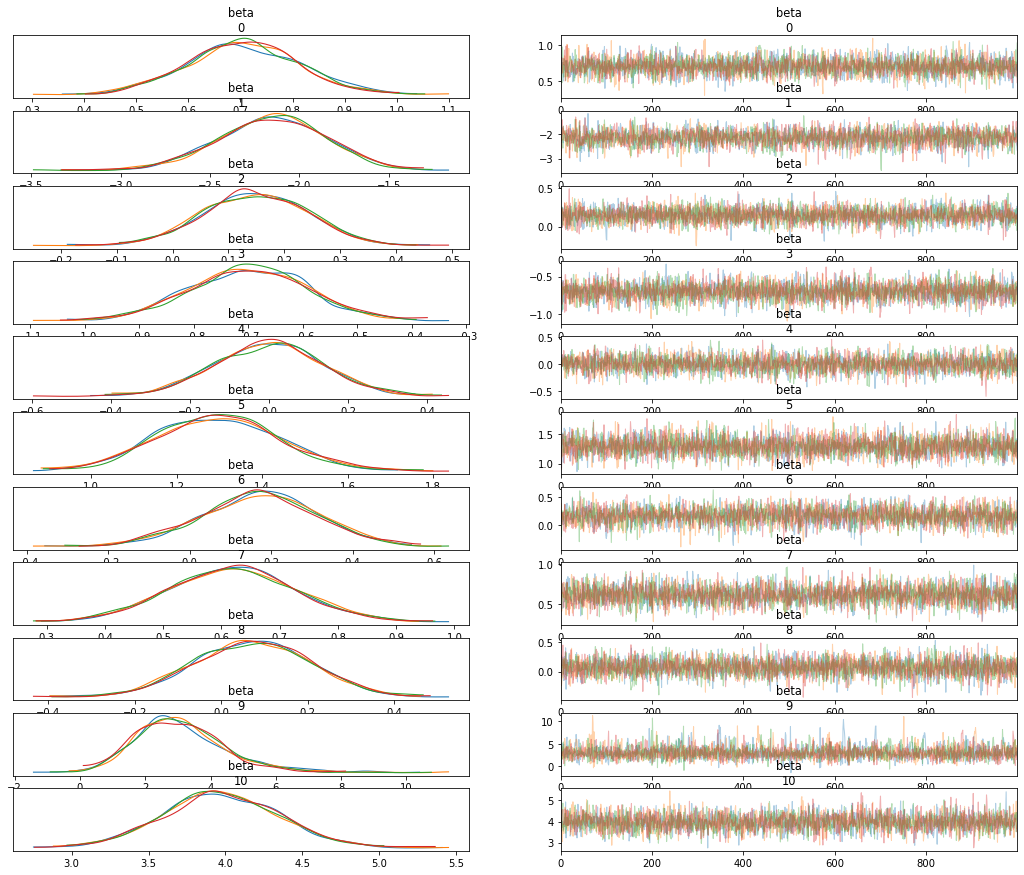

In [21]:
az.plot_trace(trace_main, compact = False, var_names = ['beta'], figsize=(18,15));

<Figure size 432x1296 with 0 Axes>

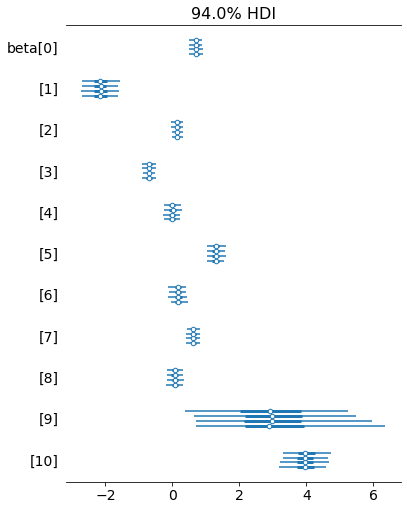

In [22]:
with complete_fetus_model:
    plt.figure(figsize=(6, 18))
    pm.plot_forest(trace_main, var_names = ['beta'])

In [23]:
complete_summary = az.summary(trace_main.posterior, var_names = ['beta'])
complete_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.705,0.110,0.484,0.900,0.002,0.001,4348.0,2949.0,1.0
beta[1],-2.157,0.301,-2.726,-1.611,0.005,0.004,3679.0,3015.0,1.0
beta[2],0.148,0.094,-0.035,0.312,0.001,0.001,4265.0,3129.0,1.0
beta[3],-0.699,0.108,-0.901,-0.493,0.002,0.001,4370.0,3116.0,1.0
beta[4],-0.002,0.136,-0.273,0.237,0.002,0.002,3828.0,2792.0,1.0
beta[5],1.296,0.146,1.018,1.568,0.002,0.002,4466.0,3392.0,1.0
beta[6],0.170,0.145,-0.109,0.439,0.002,0.002,3856.0,3247.0,1.0
beta[7],0.619,0.108,0.422,0.830,0.002,0.001,4192.0,3284.0,1.0
beta[8],0.071,0.135,-0.173,0.322,0.002,0.002,4310.0,2890.0,1.0
beta[9],3.084,1.418,0.455,5.625,0.026,0.022,3966.0,1818.0,1.0


In [24]:
# set new training X dataframe for subset model
X_train1 = training_data.drop(['fetal_outcome', 'fetal_movement', 'light_decelerations', 'mean_value_of_short_term_variability', 'mean_value_of_long_term_variability'], axis=1) # drop beta[2], beta[4], beta[6], beta[8]

In [25]:
# susbet model - important predictors (based on main model)
random.seed(2425)

with pm.Model() as subset_fetus_model:

    Y = pm.MutableData(name='Y', value=Y_train)
    X = pm.MutableData(name='X', value=X_train1)
    k = X_train1.shape[1]
    alpha = pm.Normal('alpha', mu=0, sigma=100) # intercept 
    # beta coefs in MV Gaussian
    beta = pm.MvNormal('beta', mu=np.zeros(k), cov=100*np.eye(k), shape=k)
    mu = alpha + pm.math.dot(X, beta)
    p = pm.Deterministic('p', pm.invlogit(mu))
    yhat = pm.Bernoulli('yhat', p=p, observed=Y)
    
    trace_subset = pm.sample(1000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 37 seconds.


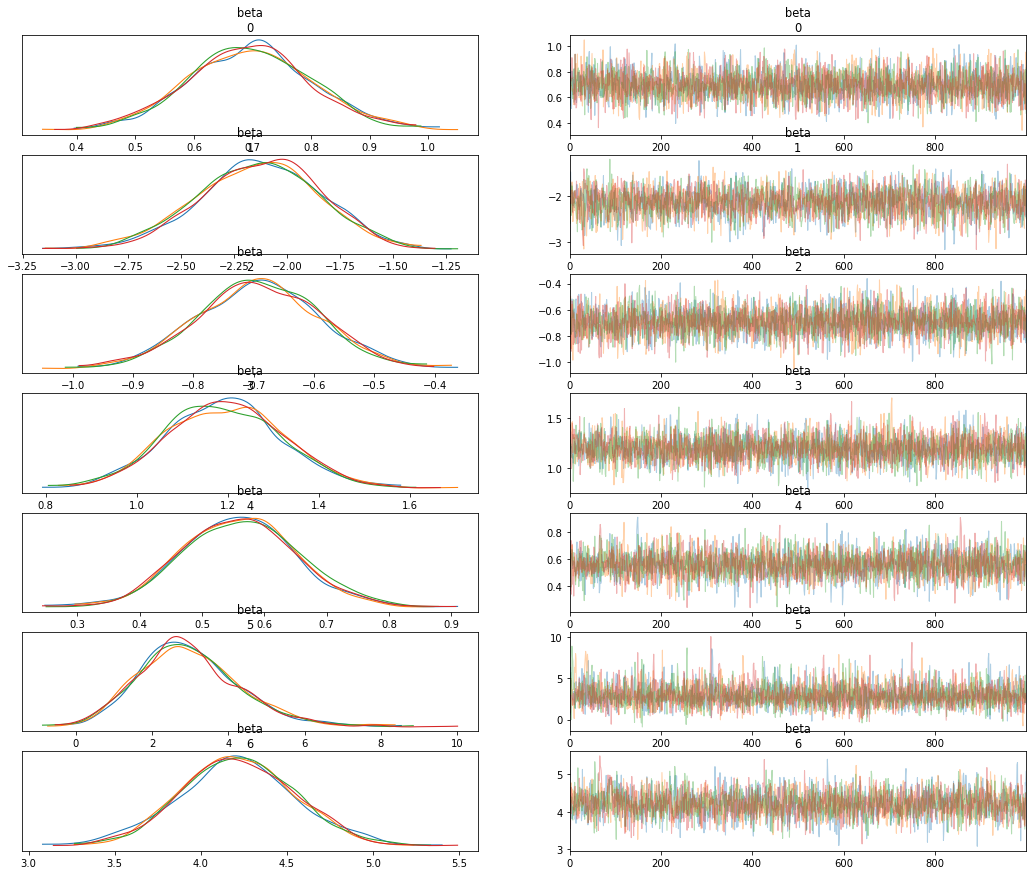

In [26]:
az.plot_trace(trace_subset, compact = False, var_names = ['beta'], figsize=(18,15));

<Figure size 432x1296 with 0 Axes>

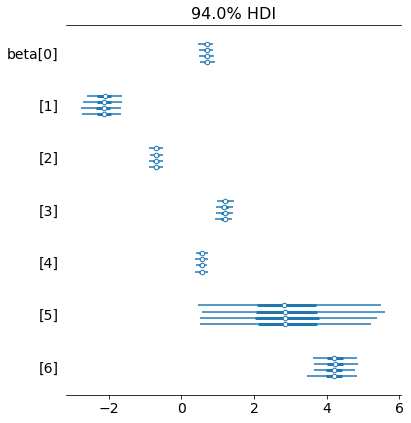

In [27]:
with subset_fetus_model:
    plt.figure(figsize=(6, 18))
    pm.plot_forest(trace_subset, var_names = ['beta'])

In [28]:
az.summary(trace_subset.posterior, var_names = ['beta'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.696,0.105,0.487,0.889,0.002,0.001,4016.0,3044.0,1.0
beta[1],-2.134,0.286,-2.692,-1.628,0.005,0.004,2812.0,3091.0,1.0
beta[2],-0.691,0.101,-0.882,-0.500,0.002,0.001,4464.0,2663.0,1.0
beta[3],1.193,0.128,0.958,1.436,0.002,0.001,3888.0,3149.0,1.0
beta[4],0.560,0.093,0.385,0.732,0.002,0.001,3549.0,2852.0,1.0
beta[5],2.987,1.355,0.521,5.446,0.023,0.019,4040.0,2254.0,1.0
beta[6],4.216,0.332,3.599,4.847,0.006,0.005,2670.0,2653.0,1.0


In [29]:
# new X train dataframe
X_train2 = training_data.drop(['fetal_outcome', 'accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability'], axis=1) # drop beta[1], beta[2],

In [30]:
# informed model - FHR, fetal movements, deceleration variables based on https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3684248/
random.seed(2425)

with pm.Model() as informed_fetus_model:

    Y = pm.MutableData(name='Y', value=Y_train)
    X = pm.MutableData(name='X', value=X_train2)
    k = X_train2.shape[1]
    alpha = pm.Normal('alpha', mu=0, sigma=100) # intercept 
    # beta coefs in MV Gaussian
    beta = pm.MvNormal('beta', mu=np.zeros(k), cov=100*np.eye(k), shape=k)
    mu = alpha + pm.math.dot(X, beta)
    p = pm.Deterministic('p', pm.invlogit(mu))
    yhat = pm.Bernoulli('yhat', p=p, observed=Y)
    
    trace_informed = pm.sample(1000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 35 seconds.


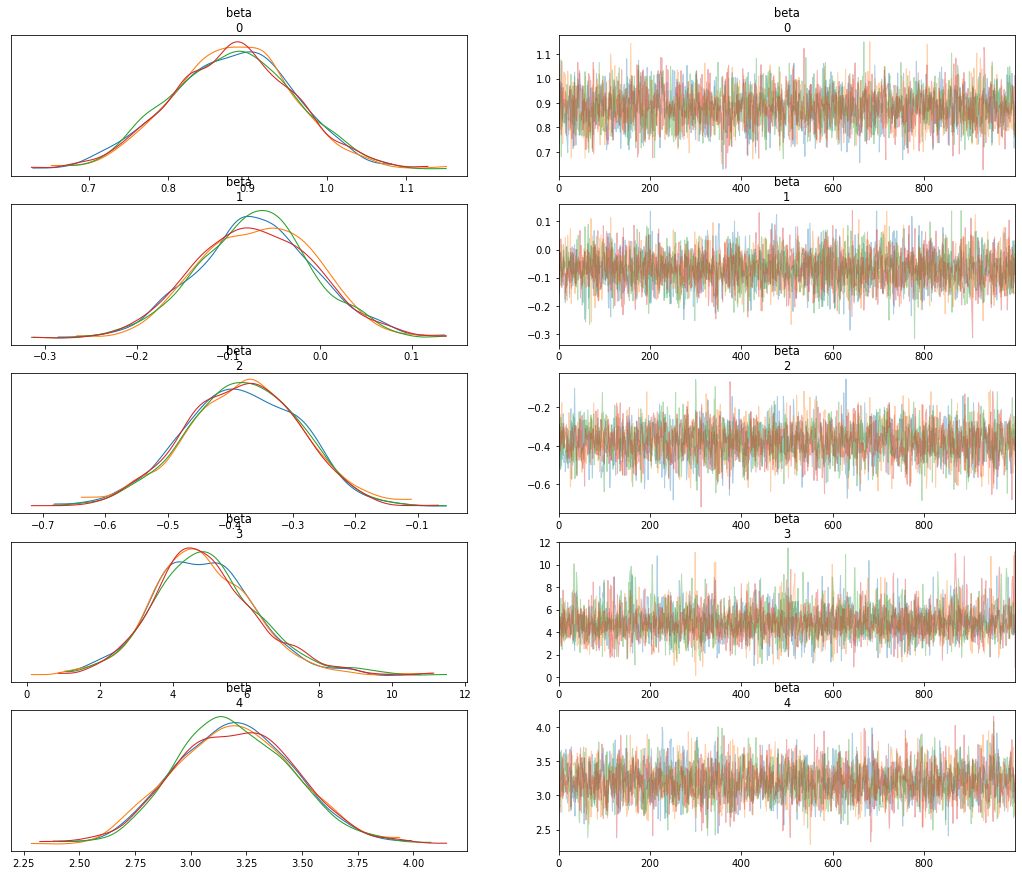

In [31]:
az.plot_trace(trace_informed, compact = False, var_names = ['beta'], figsize=(18,15));

<Figure size 432x1296 with 0 Axes>

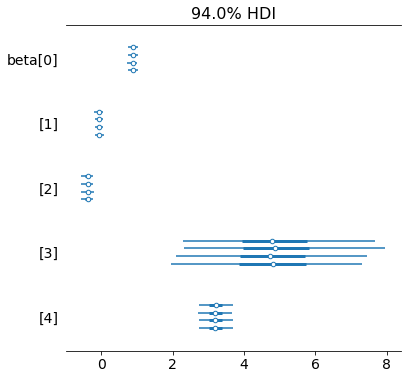

In [32]:
with informed_fetus_model:
    plt.figure(figsize=(6, 18))
    pm.plot_forest(trace_informed, var_names = ['beta'])

In [33]:
az.summary(trace_informed.posterior, var_names = ['beta'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],0.881,0.077,0.744,1.028,0.001,0.001,3339.0,3255.0,1.0
beta[1],-0.069,0.064,-0.184,0.052,0.001,0.001,4114.0,3283.0,1.0
beta[2],-0.380,0.093,-0.567,-0.221,0.002,0.001,3335.0,2783.0,1.0
beta[3],4.893,1.452,2.224,7.708,0.026,0.019,3386.0,2326.0,1.0
beta[4],3.197,0.263,2.725,3.688,0.005,0.003,2881.0,2877.0,1.0


In [34]:
# informed model WAIC
informed_waic = az.waic(trace_informed, informed_fetus_model);
informed_waic.elpd_waic

/Users/eveschoenrock/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


-749.6657962789096

In [35]:
# complete model WAIC
complete_waic = az.waic(trace_main, complete_fetus_model)
complete_waic.elpd_waic

/Users/eveschoenrock/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


-395.48216255202453

In [36]:
# subset model WAIC
subset_waic = az.waic(trace_subset, subset_fetus_model)
subset_waic.elpd_waic

/Users/eveschoenrock/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


-393.41594547176487

In [37]:
# compare models by WAIC and get weights for BMA
df_comp_waic = az.compare({"Main": trace_main, "Subset": trace_subset, "Informed": trace_informed}, ic='waic');
df_comp_waic

/Users/eveschoenrock/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/eveschoenrock/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/eveschoenrock/opt/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
Subset,0,-393.415945,9.071093,0.000000,1.000000e+00,21.688421,0.000000,True,log
Main,1,-395.482163,13.497399,2.066217,5.324144e-10,21.823016,1.917278,True,log
Informed,2,-749.665796,8.726082,356.249851,0.000000e+00,24.829152,22.617582,True,log


In [38]:
# create pseudo-BMA
weights = [df_comp_waic['weight'][0], df_comp_waic['weight'][1], df_comp_waic['weight'][2]] # complex, subset, informed

We find that the weights are essentially 1, 0, and 0. But we will continue with the pseudo-BMA regardless to see if we find better performance.

In [39]:
# sumproduct y-values & weights to get BMA y
bma_y = trace_main.posterior['p']*weights[0] + trace_subset.posterior['p']*weights[1] + trace_informed.posterior['p']*weights[2]

In [40]:
# set mean and std on various predictors
mean_fhr = fetus['baseline value'].mean()
std_fhr = fetus['baseline value'].std()

In [41]:
# investigate FHR while holding others constant - main model only
fetus.groupby(['fetal_outcome']).mean()
fhr = training_data['baseline value']*std_fhr + mean_fhr # convert back to FHR from scaled data
pos = trace_main.posterior['p']

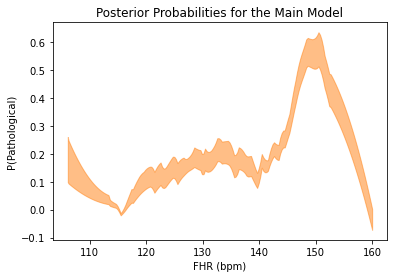

In [42]:
# complex model plot
az.plot_hdi(fhr, pos, color=f"C{1}")
plt.xlabel("FHR (bpm)")
plt.ylabel("P(Pathological)")
plt.title("Posterior Probabilities for the Main Model");

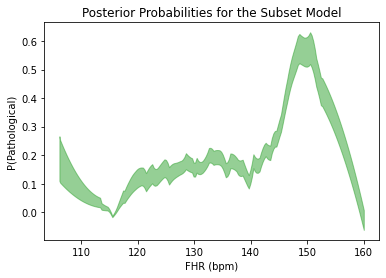

In [43]:
# subset model plot
pos = trace_subset.posterior['p']

az.plot_hdi(fhr, pos, color=f"C{2}")
plt.xlabel("FHR (bpm)")
plt.ylabel("P(Pathological)")
plt.title("Posterior Probabilities for the Subset Model");

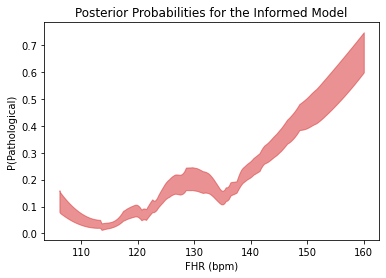

In [44]:
# informed model plot
pos = trace_informed.posterior['p']

az.plot_hdi(fhr, pos, color=f"C{3}")
plt.xlabel("FHR (bpm)")
plt.ylabel("P(Pathological)")
plt.title("Posterior Probabilities for the Informed Model");

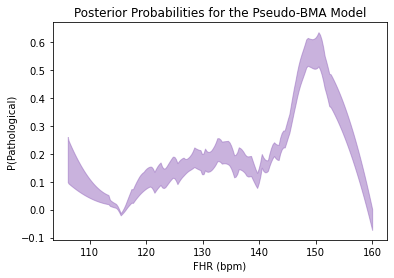

In [45]:
# BMA model plot
az.plot_hdi(fhr, bma_y, color=f"C{4}")
plt.xlabel("FHR (bpm)")
plt.ylabel("P(Pathological)")
plt.title("Posterior Probabilities for the Pseudo-BMA Model");

In [46]:
# assess predictions - complete model
pm.set_data(new_data={'X':X_test, 'Y':Y_test}, model=complete_fetus_model)
ppc_complete = pm.sample_posterior_predictive(trace_main, model = complete_fetus_model, var_names=['p', 'yhat'])

# add predictions to test data
complete_preds = ppc_complete['posterior_predictive']['p'].mean(axis=1)[0].to_numpy()
testing_data['predicted_prob'] = complete_preds


Sampling: [yhat]


In [47]:
# accuracy - complete model
classifications = [1 if x >= .3 else 0 for x in testing_data['predicted_prob']]
testing_data['class_complete'] = classifications

match = testing_data['class_complete'].eq(testing_data['fetal_outcome'])
accuracy_complete = sum(match)/len(match)

# confusion matrix
confusion_matrix = pd.crosstab(testing_data['fetal_outcome'], testing_data['class_complete'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

fnr = confusion_matrix[0][1]/(confusion_matrix[0][1] + confusion_matrix[1][1])
tpr = confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1])
fpr = confusion_matrix[1][0]/(confusion_matrix[1][0] + confusion_matrix[0][0])
tnr = confusion_matrix[0][0]/(confusion_matrix[1][0] + confusion_matrix[0][0])

Predicted    0   1
Actual            
0          289  41
1           14  81


In [48]:
print('Complete Model', '\nAccuracy:', accuracy_complete, '\nFNR:', fnr, '\nTPR:', tpr, '\nFPR:', fpr, '\nTNR:', tnr)

Complete Model 
Accuracy: 0.8705882352941177 
FNR: 0.14736842105263157 
TPR: 0.8526315789473684 
FPR: 0.12424242424242424 
TNR: 0.8757575757575757


In [49]:
# subset test X dataframe
X_test1 = testing_data.drop(['fetal_outcome', 'fetal_movement', 'light_decelerations', 'mean_value_of_short_term_variability', 'mean_value_of_long_term_variability', 'predicted_prob', 'class_complete'], axis=1) # drop beta[1], beta[2], beta[4], beta[6], beta[8]

In [50]:
# assess predictions - subset model
pm.set_data(new_data={'X':X_test1, 'Y':Y_test}, model=subset_fetus_model)
ppc_complete = pm.sample_posterior_predictive(trace_subset, model = subset_fetus_model, var_names=['p', 'yhat'])

# add predictions to test data
subset_preds = ppc_complete['posterior_predictive']['p'].mean(axis=1)[0].to_numpy()
testing_data['predicted_prob1'] = subset_preds

Sampling: [yhat]


In [51]:
# accuracy - subset model
classifications = [1 if x >= .37 else 0 for x in testing_data['predicted_prob1']]
testing_data['class_subset'] = classifications

match = testing_data['class_subset'].eq(testing_data['fetal_outcome'])
accuracy_subset = sum(match)/len(match)

# confusion matrix
confusion_matrix = pd.crosstab(testing_data['fetal_outcome'], testing_data['class_subset'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

fnr = confusion_matrix[0][1]/(confusion_matrix[0][1] + confusion_matrix[1][1])
tpr = confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1])

Predicted    0   1
Actual            
0          295  35
1           17  78


In [52]:
print('Subset Model', '\nAccuracy:', accuracy_subset, '\nFNR:', fnr, '\nTPR:', tpr)

Subset Model 
Accuracy: 0.8776470588235294 
FNR: 0.17894736842105263 
TPR: 0.8210526315789474


The subset model is not looking as good as our complete model.

In [53]:
# informed test X dataframe
X_test2 = testing_data.drop(['fetal_outcome', 'accelerations', 'uterine_contractions', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'predicted_prob', 'class_complete', 'predicted_prob1', 'class_subset'], axis=1) # drop beta[1], beta[2], beta[4], beta[6], beta[8]

In [54]:
# assess predictions - informed model
pm.set_data(new_data={'X':X_test2, 'Y':Y_test}, model=informed_fetus_model)
ppc_complete = pm.sample_posterior_predictive(trace_informed, model = informed_fetus_model, var_names=['p', 'yhat'])

# add predictions to test data
informed_preds = ppc_complete['posterior_predictive']['p'].mean(axis=1)[0].to_numpy()
testing_data['predicted_prob2'] = informed_preds

Sampling: [yhat]


In [55]:
# accuracy - informed model
classifications = [1 if x >= .3 else 0 for x in testing_data['predicted_prob2']]
testing_data['class_informed'] = classifications

match = testing_data['class_informed'].eq(testing_data['fetal_outcome'])
accuracy_informed = sum(match)/len(match)

# confusion matrix
confusion_matrix = pd.crosstab(testing_data['fetal_outcome'], testing_data['class_informed'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

fnr = confusion_matrix[0][1]/(confusion_matrix[0][1] + confusion_matrix[1][1])
tpr = confusion_matrix[1][1]/(confusion_matrix[0][1] + confusion_matrix[1][1])

Predicted    0   1
Actual            
0          266  64
1           34  61


In [56]:
print('Informed Model', '\nAccuracy:', accuracy_informed, '\nFNR:', fnr, '\nTPR:', tpr)

Informed Model 
Accuracy: 0.7694117647058824 
FNR: 0.35789473684210527 
TPR: 0.6421052631578947


The informed model performs worse than our complete model and subset model.